<a href="https://colab.research.google.com/github/PeddarajuPraveen/FSD/blob/main/logistic_reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

/tmp/ipython-input-2923553835.py:33: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train["Age"].fillna(train["Age"].median(), inplace=True)
/tmp/ipython-input-2923553835.py:34: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

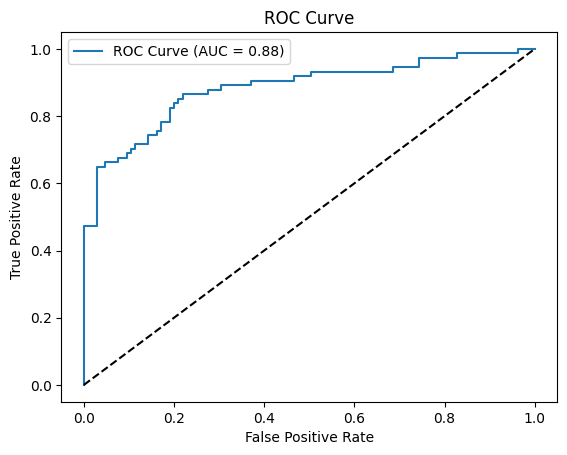

   PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         0
4          896         1


In [12]:
# ========================================
# 1. Load Libraries
# ========================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix, classification_report

# ========================================
# 2. Load Data
# ========================================
train = pd.read_csv("Titanic_train.csv")
test = pd.read_csv("Titanic_test.csv")

# Quick look
print(train.head())
print(train.info())

# ========================================
# 3. Preprocessing
# ========================================

# Drop irrelevant string columns
drop_cols = ["Name", "Ticket", "Cabin"]
train.drop(columns=drop_cols, inplace=True, errors="ignore")
test.drop(columns=drop_cols, inplace=True, errors="ignore")

# Fill missing values
train["Age"].fillna(train["Age"].median(), inplace=True)
train["Embarked"].fillna(train["Embarked"].mode()[0], inplace=True)

test["Age"].fillna(test["Age"].median(), inplace=True)
test["Fare"].fillna(test["Fare"].median(), inplace=True)
test["Embarked"].fillna(test["Embarked"].mode()[0], inplace=True)

# One-hot encoding
train = pd.get_dummies(train, columns=["Sex", "Embarked"], drop_first=True)
test  = pd.get_dummies(test, columns=["Sex", "Embarked"], drop_first=True)

# Define features/target
X = train.drop(columns=["Survived", "PassengerId"])
y = train["Survived"]

# Align test with training
X_test_final = test.drop(columns=["PassengerId"])
X_test_final = X_test_final.reindex(columns=X.columns, fill_value=0)

# Train-test split for validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# ========================================
# 4. Model Training
# ========================================
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# ========================================
# 5. Model Evaluation
# ========================================
y_pred = model.predict(X_val)
y_proba = model.predict_proba(X_val)[:, 1]

print("\nClassification Report:\n", classification_report(y_val, y_pred))
print("Accuracy:", accuracy_score(y_val, y_pred))
print("Precision:", precision_score(y_val, y_pred))
print("Recall:", recall_score(y_val, y_pred))
print("F1 Score:", f1_score(y_val, y_pred))
print("ROC-AUC:", roc_auc_score(y_val, y_proba))

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_val, y_proba)
plt.plot(fpr, tpr, label="ROC Curve (AUC = {:.2f})".format(roc_auc_score(y_val, y_proba)))
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# ========================================
# 6. Predict on Test Data
# ========================================
test_preds = model.predict(X_test_final)

# Create submission DataFrame
submission = pd.DataFrame({
    "PassengerId": test["PassengerId"],
    "Survived": test_preds
})

print(submission.head())

# Save to CSV
submission.to_csv("titanic_logreg_submission.csv", index=False)


In [13]:
import joblib

# Save trained model
joblib.dump(model, "titanic_model.pkl")

# Save column names (important for preprocessing in Streamlit)
joblib.dump(X.columns.tolist(), "titanic_features.pkl")


['titanic_features.pkl']